In [1]:
from sentence_transformers import SentenceTransformer

# 1. Load a pretrained Sentence Transformer model
model = SentenceTransformer("all-MiniLM-L6-v2")

# The sentences to encode
sentences = [
    "The weather is lovely today.",
    "It's so sunny outside!",
    "He drove to the stadium.",
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode(sentences)
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)
# tensor([[1.0000, 0.6660, 0.1046],
#         [0.6660, 1.0000, 0.1411],
#         [0.1046, 0.1411, 1.0000]])

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

(3, 384)
tensor([[1.0000, 0.6660, 0.1046],
        [0.6660, 1.0000, 0.1411],
        [0.1046, 0.1411, 1.0000]])


In [13]:
majors = [
    "Advanced Chemical Engineering MSc",
    "Advanced Chemical Engineering with Biotechnology MSc",
    "Advanced Chemical Engineering with Materials Engineering MSc",
    "Advanced Computing MSc",
    "Advanced Aeronautical Engineering MSc",
    "Advanced Materials Science and Engineering MSc",
    "Advanced Mechanical Engineering MSc",
    "Climate Change, Management and Finance MSc",
    "Computing MSc"
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode([f'{m}' for m in majors])
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity([embeddings[0]], embeddings)
print(similarities)

(9, 384)
tensor([[1.0000, 0.8649, 0.9105, 0.5729, 0.6147, 0.7617, 0.6545, 0.3883, 0.5012]])


In [11]:
prefers = [
    "I like apple",
    "I like fruit",
    "I don't like apple",
    "I don't like fruit",
    "Computing MSc"
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode([f'{m}' for m in prefers])
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)

(5, 384)
tensor([[1.0000, 0.6297, 0.8264, 0.4898, 0.1321],
        [0.6297, 1.0000, 0.4507, 0.7980, 0.0762],
        [0.8264, 0.4507, 1.0000, 0.6290, 0.1471],
        [0.4898, 0.7980, 0.6290, 1.0000, 0.1027],
        [0.1321, 0.0762, 0.1471, 0.1027, 1.0000]])


(9, 384)
tensor([[1.0000, 0.5012, 0.3636, 0.3858, 0.8185, 0.5529, 0.4814, 0.5466, 0.4472],
        [0.5012, 1.0000, 0.8649, 0.9105, 0.5729, 0.6147, 0.7617, 0.6545, 0.3883],
        [0.3636, 0.8649, 1.0000, 0.8075, 0.4351, 0.5006, 0.5991, 0.5296, 0.3125],
        [0.3858, 0.9105, 0.8075, 1.0000, 0.4828, 0.5257, 0.8635, 0.6271, 0.2846],
        [0.8185, 0.5729, 0.4351, 0.4828, 1.0000, 0.6258, 0.5845, 0.6224, 0.3626],
        [0.5529, 0.6147, 0.5006, 0.5257, 0.6258, 1.0000, 0.6049, 0.7564, 0.3799],
        [0.4814, 0.7617, 0.5991, 0.8635, 0.5845, 0.6049, 1.0000, 0.7078, 0.3608],
        [0.5466, 0.6545, 0.5296, 0.6271, 0.6224, 0.7564, 0.7078, 1.0000, 0.3469],
        [0.4472, 0.3883, 0.3125, 0.2846, 0.3626, 0.3799, 0.3608, 0.3469, 1.0000]])


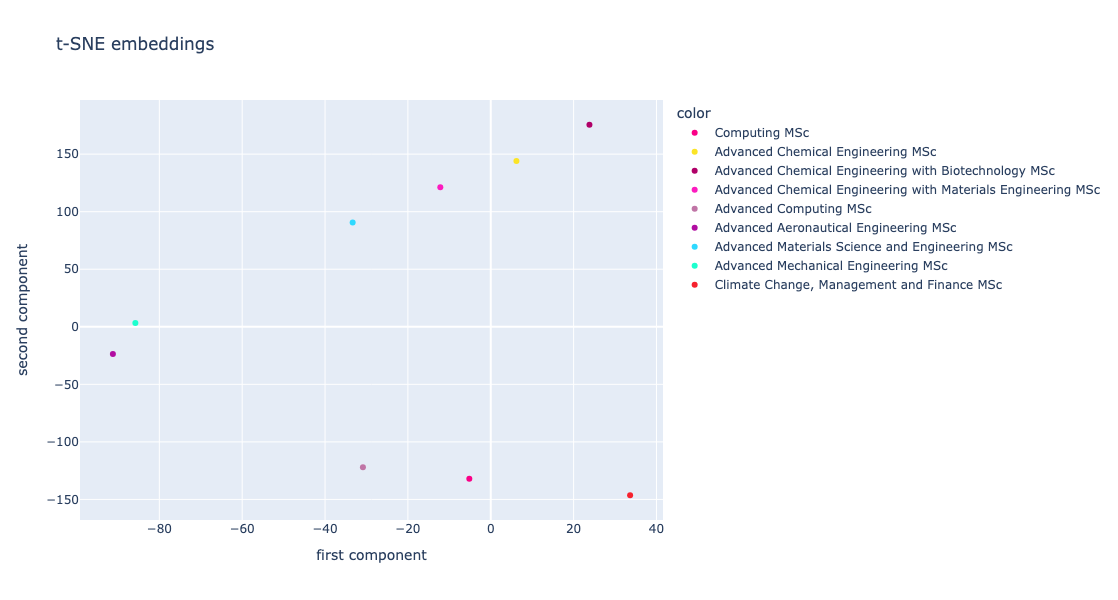

In [19]:
from sklearn.manifold import TSNE
import plotly.express as px
import plotly
prefers = [
    # "I like apple",
    # "I like fruit",
    # "I don't like apple",
    # "I don't like fruit",
    "Computing MSc",
    "Advanced Chemical Engineering MSc",
    "Advanced Chemical Engineering with Biotechnology MSc",
    "Advanced Chemical Engineering with Materials Engineering MSc",
    "Advanced Computing MSc",
    "Advanced Aeronautical Engineering MSc",
    "Advanced Materials Science and Engineering MSc",
    "Advanced Mechanical Engineering MSc",
    "Climate Change, Management and Finance MSc",
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode([f'{m}' for m in prefers])
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)
embeddings_array = embeddings
tsne_model = TSNE(n_components=2, perplexity=2, random_state=42)
tsne_embeddings_values = tsne_model.fit_transform(embeddings_array)

fig = px.scatter(
    x = tsne_embeddings_values[:,0], 
    y = tsne_embeddings_values[:,1],
    color = prefers,
    hover_name = prefers,
    title = 't-SNE embeddings', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r
)

fig.update_layout(
    xaxis_title = 'first component', 
    yaxis_title = 'second component')
fig.show()

(9, 384)
tensor([[1.0000, 0.5012, 0.3636, 0.3858, 0.8185, 0.5529, 0.4814, 0.5466, 0.4472],
        [0.5012, 1.0000, 0.8649, 0.9105, 0.5729, 0.6147, 0.7617, 0.6545, 0.3883],
        [0.3636, 0.8649, 1.0000, 0.8075, 0.4351, 0.5006, 0.5991, 0.5296, 0.3125],
        [0.3858, 0.9105, 0.8075, 1.0000, 0.4828, 0.5257, 0.8635, 0.6271, 0.2846],
        [0.8185, 0.5729, 0.4351, 0.4828, 1.0000, 0.6258, 0.5845, 0.6224, 0.3626],
        [0.5529, 0.6147, 0.5006, 0.5257, 0.6258, 1.0000, 0.6049, 0.7564, 0.3799],
        [0.4814, 0.7617, 0.5991, 0.8635, 0.5845, 0.6049, 1.0000, 0.7078, 0.3608],
        [0.5466, 0.6545, 0.5296, 0.6271, 0.6224, 0.7564, 0.7078, 1.0000, 0.3469],
        [0.4472, 0.3883, 0.3125, 0.2846, 0.3626, 0.3799, 0.3608, 0.3469, 1.0000]])


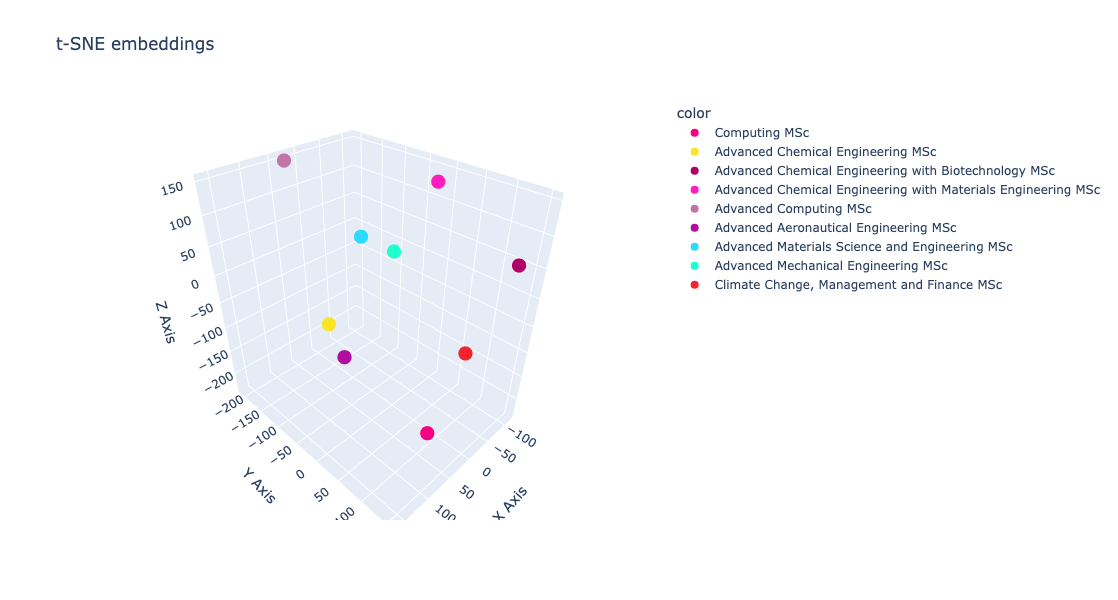

In [25]:
from sklearn.manifold import TSNE
import plotly.express as px
import plotly
prefers = [
    # "I like apple",
    # "I like fruit",
    # "I don't like apple",
    # "I don't like fruit",
    "Computing MSc",
    "Advanced Chemical Engineering MSc",
    "Advanced Chemical Engineering with Biotechnology MSc",
    "Advanced Chemical Engineering with Materials Engineering MSc",
    "Advanced Computing MSc",
    "Advanced Aeronautical Engineering MSc",
    "Advanced Materials Science and Engineering MSc",
    "Advanced Mechanical Engineering MSc",
    "Climate Change, Management and Finance MSc",
]

# 2. Calculate embeddings by calling model.encode()
embeddings = model.encode([f'{m}' for m in prefers])
print(embeddings.shape)
# [3, 384]

# 3. Calculate the embedding similarities
similarities = model.similarity(embeddings, embeddings)
print(similarities)
embeddings_array = embeddings
tsne_model = TSNE(n_components=3, perplexity=3, random_state=42)
tsne_embeddings_values = tsne_model.fit_transform(embeddings_array)

fig = px.scatter_3d(
    x = tsne_embeddings_values[:,0], 
    y = tsne_embeddings_values[:,1],
    z = tsne_embeddings_values[:,2],
    color = prefers,
    hover_name = prefers,
    title = 't-SNE embeddings', width = 800, height = 600,
    color_discrete_sequence = plotly.colors.qualitative.Alphabet_r,
    labels={'x': 'X Axis', 'y': 'Y Axis', 'z': 'Z Axis'}
)
fig.show()

In [12]:
embeddings.shape

(5, 384)